In [1]:
# Importing the Keras libraries and packages
import os

import pandas as pd

import pickle

import numpy as np

import tensorflow as tf

from tensorflow.keras.models import load_model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model

from PIL import Image

In [2]:
# Initialising the CNN
classifier = tf.keras.models.Sequential()

classifier.add(tf.keras.layers.Convolution2D(filters=32, 
                                             kernel_size=3,
                                             padding="same", 
                                             input_shape=(64, 64, 3),
                                             activation='relu'))

classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, 
                                            strides=2, 
                                            padding='valid'))

classifier.add(tf.keras.layers.Convolution2D(filters=64, 
                                             kernel_size=3, 
                                             padding="same", 
                                             activation="relu"))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, 
                                            strides=2, 
                                            padding='valid'))

classifier.add(tf.keras.layers.Flatten())

classifier.add(tf.keras.layers.Dense(units=128, 
                                     activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1, 
                                     activation='sigmoid'))

classifier.compile(optimizer='adam', 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])
classifier.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2097280   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [3]:
# Part 2 - Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory(r"C:\Users\dell\Desktop\MYFILES\anaconda\Covid-19-chest-x-ray-detection\Data\train",
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(r"C:\Users\dell\Desktop\MYFILES\anaconda\Covid-19-chest-x-ray-detection\Data\train",
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [4]:
#training 
history = classifier.fit(training_set,
                         steps_per_epoch=4,
                         epochs=25,
                         validation_data=test_set,
                         validation_steps=4)

Epoch 1/25
4/4 [==============================] - 5s 1s/step - loss: 0.7675 - accuracy: 0.4100 - val_loss: 0.5895 - val_accuracy: 0.9600
Epoch 2/25
4/4 [==============================] - 4s 908ms/step - loss: 0.5610 - accuracy: 0.8800 - val_loss: 0.4470 - val_accuracy: 0.9400
Epoch 3/25
4/4 [==============================] - 4s 1s/step - loss: 0.4394 - accuracy: 0.8100 - val_loss: 0.2314 - val_accuracy: 0.9700
Epoch 4/25
4/4 [==============================] - 4s 919ms/step - loss: 0.3233 - accuracy: 0.8900 - val_loss: 0.1677 - val_accuracy: 0.9500
Epoch 5/25
4/4 [==============================] - 4s 903ms/step - loss: 0.3413 - accuracy: 0.8500 - val_loss: 0.1203 - val_accuracy: 0.9700
Epoch 6/25
4/4 [==============================] - 4s 900ms/step - loss: 0.2666 - accuracy: 0.9000 - val_loss: 0.2671 - val_accuracy: 0.8500
Epoch 7/25
4/4 [==============================] - 4s 953ms/step - loss: 0.1645 - accuracy: 0.9500 - val_loss: 0.0839 - val_accuracy: 0.9700
Epoch 8/25
4/4 [==========

In [5]:

classifier.save(r'C:\Users\dell\Desktop\MYFILES\COVID-19/model.h5')

In [6]:
# evaluation on test set
loaded_model = tf.keras.models.load_model(r'C:\Users\dell\Desktop\MYFILES\COVID-19/model.h5')
loaded_model.evaluate(test_set)

4/4 [==============================] - 1s 361ms/step - loss: 0.0095 - accuracy: 1.0000


[0.009477389976382256, 1.0]

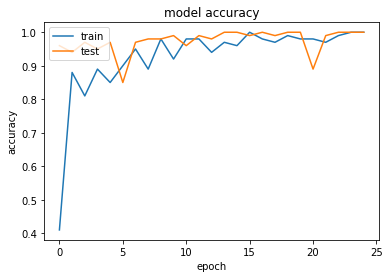

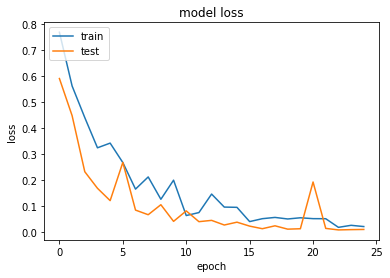

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Covid


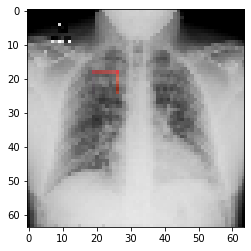

In [12]:
# for only one prediction
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
test_image = image.load_img(r"C:\Users\dell\Desktop\MYFILES\anaconda\Covid-19-chest-x-ray-detection\Data\test\Normal\aaa.jpg"
                           , target_size=(64,64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)

training_set.class_indices
if result[0][0] == 1:
    prediction = 'No - Covid'
else:
    prediction = 'Covid'
print(prediction)

In [9]:
# plot confusion metrix
y_pred = []
y_test = []
import os
for i in os.listdir('Data/test/Normal/'):
    img = image.load_img('Data/test/Normal/' + i, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = classifier.predict_classes(img)
    y_test.append(p[0, 0])
    y_pred.append(1)
for i in os.listdir('Data/test/Covid/'):
    img = image.load_img('Data/test/Covid/'+ i, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = classifier.predict_classes(img)
    y_test.append(p[0, 0])
    y_pred.append(0)

y_pred = np.array(y_pred)
y_test = np.array(y_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


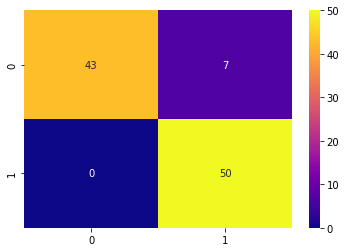

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        50
           1       0.88      1.00      0.93        50

    accuracy                           0.93       100
   macro avg       0.94      0.93      0.93       100
weighted avg       0.94      0.93      0.93       100



In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, cmap="plasma", annot=True)
plt.show()

print(classification_report(y_pred, y_test))
